### Wykorzystanie metody Eulera do szacowania wychylenia oscylatora harmonicznego bez uwzględniania dyssypacji energii

Stała sprężystości a siła:

$$-kx = m\ddot{x}$$



Wiedząc, że: 

$$\omega =\sqrt{\frac{k}{m}}$$

Zapisujemy:

$$ \ddot{x} + \omega^2x = 0 $$



Równanie powyżej jest równaniem rózniczkowym drugiego stopnia.
Potrzebujemy dwóch warunków początkowych, pozycję x(0) oraz szybkość x`(0).

$$ x(0) = X_{0}$$
$$ {x}'(0) = 0 $$

Równanie rozwiązujemy przez odpowiednie podstawienia:

$$u = x$$
$$v = \dot{x}$$

Otrzymujemy:

$${u}'=v$$
$${v}'=-\omega ^{2}\cdot u$$

### Kod:

In [1]:
import ipywidgets as widgets, matplotlib.pyplot as plt
from numpy import zeros, linspace, pi, cos, array


def oscylator(a, b):

    omega = 2
    okres = 2*pi/omega
    dt = okres/a
    T = b*okres
    powtorzenia = int(round(T/dt))

    #Naniesienie jednostki na oś poziomą
    osPozioma = linspace(0, powtorzenia*dt, powtorzenia+1)

    u = zeros(powtorzenia+1)
    v = zeros(powtorzenia+1)

    # warunki poczatkowe
    X_0 = 1
    u[0] = X_0
    v[0] = 0

    # kolejne kroki metoda Eulera
    for n in range(powtorzenia):
        u[n+1] = u[n] + dt*v[n]
        v[n+1] = v[n] - dt*omega**2*u[n]

    fig = plt.figure()
    l1, l2 = plt.plot(osPozioma, u, 'b-', osPozioma, X_0*cos(omega*osPozioma), 'r--')
    fig.legend((l1, l2), ('Numerycznie', 'Analitycznie'), 'upper right')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title("Wychylenie od czasu")
    plt.show()

widgets.interact(oscylator, a=widgets.IntSlider(
    value=20,
    min=15,
    max=1000,
    step=1,
    description='Podział:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
), b = widgets.IntSlider(
    value=3,
    min=2,
    max=20,
    step=1,
    description='Okresy:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))


interactive(children=(IntSlider(value=20, continuous_update=False, description='Podział:', max=1000, min=15), …

<function __main__.oscylator(a, b)>

### Czas potrebny na obliczenia w zależności od danej dokładności metody Eulera

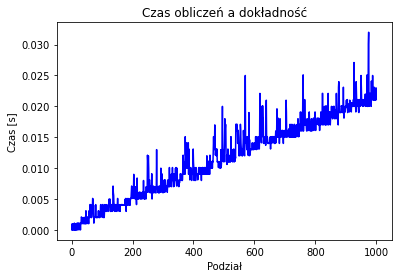

In [6]:
import matplotlib.pyplot as plt, time, math
from numpy import zeros, linspace, pi, cos, array

def oscylator(a):

    t0= time.time()
    omega = 2
    okres = 2*pi/omega
    dt = okres/a
    T = 10*okres
    powtorzenia = int(round(T/dt))

    #Naniesienie jednostki na oś poziomą
    osPozioma = linspace(0, powtorzenia*dt, powtorzenia+1)

    u = zeros(powtorzenia+1)
    v = zeros(powtorzenia+1)

    # warunki poczatkowe
    X_0 = 1
    u[0] = X_0
    v[0] = 0

    # kolejne kroki metoda Eulera
    for n in range(powtorzenia):
        u[n+1] = u[n] + dt*v[n]
        v[n+1] = v[n] - dt*omega**2*u[n]
    t1 = time.time() - t0
    t1 = round_up(t1, 4)
    czas.append(t1)

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier


czas = []
podzial = []
for i in range(1000):
    oscylator(i + 1)
    podzial.append(i + 1)


fig = plt.figure()
l1 = plt.plot(podzial, czas, 'b-',)
plt.xlabel('Podział')
plt.ylabel('Czas [s]')
plt.title("Czas obliczeń a dokładność")
plt.show()


![Wykres](https://i.imgur.com/kpblXjw.png)